# 🛍️ Myntra End to End data analysis  #

## Importing Libraries & Load Dataset ##

In [3]:
import pandas as pd 
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df= pd.read_csv("myntra_dataset_ByScraping.csv")

# Basic view
df.head()

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,0.45,4.2,57.0
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,0.39,4.6,5.0
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,0.61,3.6,1100.0
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,0.62,4.0,4800.0
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,0.49,4.3,264.0


## Basic Structure Check ##

In [4]:
df.shape

(52120, 7)

In [5]:
df.columns

Index(['brand_name', 'pants_description', 'price', 'MRP', 'discount_percent',
       'ratings', 'number_of_ratings'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52120 entries, 0 to 52119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_name         52120 non-null  object 
 1   pants_description  52120 non-null  object 
 2   price              52120 non-null  float64
 3   MRP                52120 non-null  float64
 4   discount_percent   52120 non-null  float64
 5   ratings            52120 non-null  float64
 6   number_of_ratings  52120 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [8]:
df.isnull().sum().sort_values(ascending = False)

brand_name           0
pants_description    0
price                0
MRP                  0
discount_percent     0
ratings              0
number_of_ratings    0
dtype: int64

## Finding duplicate rows ##

In [9]:
df.duplicated().sum()

17047

In [10]:
df[df.duplicated()].head()

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
50,Mufti,Men Slim Fit Jeans,1649.0,3299.0,0.50,4.2,5.0
200,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,0.45,4.2,57.0
201,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,0.39,4.6,5.0
204,WROGN,Men Anti Fit Jeans,1623.0,2799.0,0.42,4.2,42.0
207,Roadster,Men Regular Fit Mid-Rise Jeans,759.0,1899.0,0.60,4.0,63.0


In [13]:
df[df.duplicated(subset=['pants_description', 'brand_name'], keep=False)].head()


,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,0.45,4.2,57.0
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,0.39,4.6,5.0
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,0.61,3.6,1100.0
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,0.62,4.0,4800.0
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,0.49,4.3,264.0


In [14]:
df = df.drop_duplicates()


In [15]:
df.duplicated().sum()


0

## Statistical Summary ##

In [16]:
df.describe()

,price,MRP,discount_percent,ratings,number_of_ratings
count,35073.000000,35073.000000,35073.000000,35073.000000,35073.000000
mean,1618.151627,3277.913654,2.039860,3.975617,103.707296
std,1758.242730,2572.046817,5.446518,0.453471,520.459162
min,337.000000,499.000000,0.020000,1.000000,5.000000
25%,899.000000,2399.000000,0.400000,3.800000,14.000000
50%,1418.000000,2999.000000,0.550000,4.000000,31.000000
75%,1829.000000,3699.000000,0.650000,4.200000,75.000000
max,54000.000000,72000.000000,64.000000,5.000000,30700.000000


# Initial EDA #

## 📊 Price Distribution ##

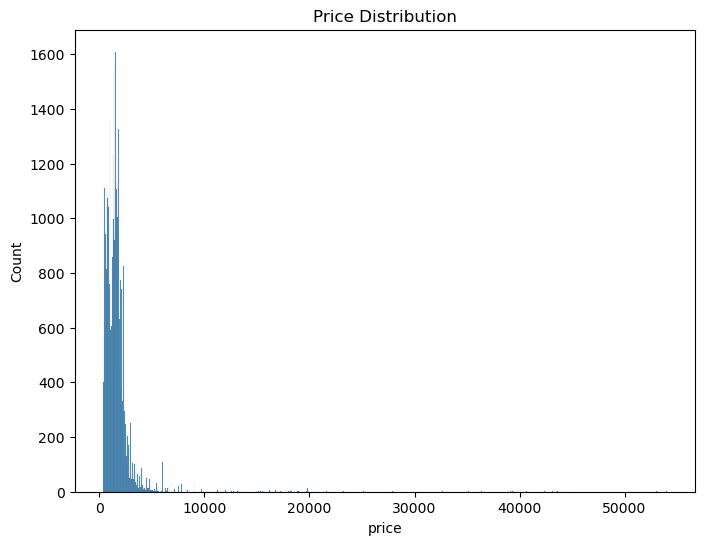

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df["price"])
plt.title("Price Distribution")
plt.show()

## 📊 Rating Distribution ##

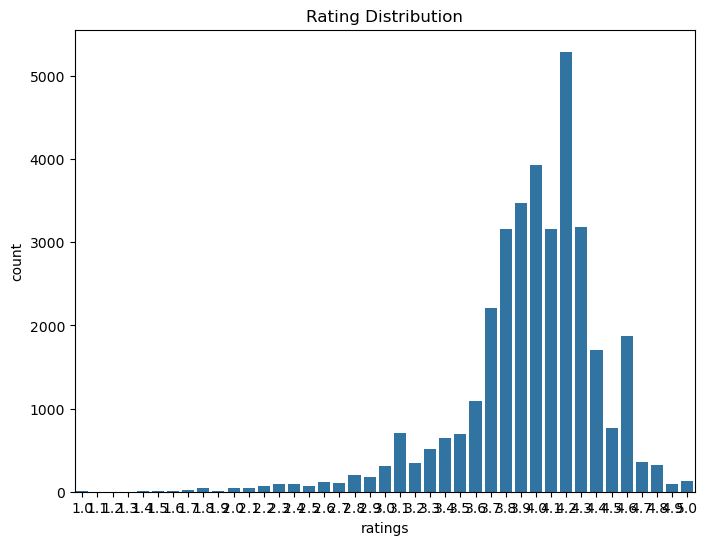

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x="ratings",data=df)
plt.title("Rating Distribution")
plt.show()

## 📊 Top Brands by Product Count ##

In [26]:
df["brand_name"].value_counts().head(10)

brand_name
United Colors of Benetton    3300
Flying Machine               2576
Roadster                     1796
SPYKAR                       1149
WROGN                        1101
U.S. Polo Assn. Denim Co.     850
V-Mart                        800
glitchez                      784
Pepe Jeans                    659
LINARIA                       654
Name: count, dtype: int64

# Cleaning Desicions #

In [27]:
df.columns = df.columns.str.lower().str.replace(" ", "_")


# Exporting Clean Data #

In [ ]:
df.to_csv("myntra_cleaned.csv", index=False)
print("Data")